# unsafe.Pointer usage survey



In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import json
from datetime import datetime

In [3]:
MATCH_TYPES = (
    'unsafe.Pointer', 'unsafe.Sizeof', 'unsafe.Alignof', 'unsafe.Offsetof',
    'uintptr', 'reflect.SliceHeader', 'reflect.StringHeader'
)

## Analyse von Projektdaten

In [4]:
projects_df = pd.read_csv('/root/data/projects.csv',
                         parse_dates=['project_created_at', 'project_last_pushed_at', 'project_updated_at'])

In [5]:
projects_df[:5]

,project_name,project_rank,project_github_clone_url,project_number_of_stars,project_number_of_forks,project_github_id,project_created_at,project_last_pushed_at,project_updated_at,project_size,project_checkout_path
0,golang/go,1,https://github.com/golang/go.git,71418,10193,23096959,2014-08-19 04:33:40+00:00,2020-04-18 20:57:20+00:00,2020-04-18 20:08:52+00:00,210030,/root/download/go
1,kubernetes/kubernetes,2,https://github.com/kubernetes/kubernetes.git,65134,23200,20580498,2014-06-06 22:56:04+00:00,2020-04-18 20:02:41+00:00,2020-04-18 19:41:33+00:00,909658,/root/download/kubernetes
2,moby/moby,3,https://github.com/moby/moby.git,56855,16432,7691631,2013-01-18 18:10:57+00:00,2020-04-18 19:25:14+00:00,2020-04-18 20:33:23+00:00,153084,/root/download/moby
3,avelino/awesome-go,4,https://github.com/avelino/awesome-go.git,53568,7109,21540759,2014-07-06 13:42:15+00:00,2020-04-17 21:01:23+00:00,2020-04-18 20:28:01+00:00,8314,/root/download/awesome-go
4,gohugoio/hugo,5,https://github.com/gohugoio/hugo.git,43293,4916,11180687,2013-07-04 15:26:26+00:00,2020-04-18 12:16:44+00:00,2020-04-18 20:33:36+00:00,86028,/root/download/hugo


## Analyse von Grep Daten

In [6]:
grep_df = pd.read_csv('/root/data/grep_findings_0_499.csv')

In [7]:
grep_df

,text,context,line_number,column,absolute_offset,match_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,file_copy_path
0,var CacheLineSize uintptr = CacheLinePadSize\n,\n// CacheLineSize is the CPU's assumed cache ...,20,18,769,uintptr,cpu.go,7184,245,internal/cpu,std,std,kubernetes/kubernetes,internal/cpu/cpu.go
1,\toffsetX86HasSSE2 = unsafe.Offsetof(cpu.X86...,)\n\n// Offsets into internal/cpu records for ...,14,22,281,unsafe.Offsetof,bytealg.go,664,23,internal/bytealg,std,std,kubernetes/kubernetes,internal/bytealg/bytealg.go
2,\toffsetX86HasSSE42 = unsafe.Offsetof(cpu.X86...,\n// Offsets into internal/cpu records for use...,15,22,336,unsafe.Offsetof,bytealg.go,664,23,internal/bytealg,std,std,kubernetes/kubernetes,internal/bytealg/bytealg.go
3,\toffsetX86HasAVX2 = unsafe.Offsetof(cpu.X86...,// Offsets into internal/cpu records for use i...,16,22,392,unsafe.Offsetof,bytealg.go,664,23,internal/bytealg,std,std,kubernetes/kubernetes,internal/bytealg/bytealg.go
4,\toffsetX86HasPOPCNT = unsafe.Offsetof(cpu.X86...,const (\n\toffsetX86HasSSE2 = unsafe.Offseto...,17,22,447,unsafe.Offsetof,bytealg.go,664,23,internal/bytealg,std,std,kubernetes/kubernetes,internal/bytealg/bytealg.go
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2738988,\t\tm.hash = make(map[uintptr]*profMapEntry)\n,\tfor j := range stk {\n\t\te.stk[j] = uintptr...,79,20,1820,uintptr,map.go,1984,90,runtime/pprof,std,std,bosun-monitor/bosun,runtime/pprof/map.go
2738989,\tpcs [1]uintptr\n,\tmu sync.Mutex\n\t// file holds writer for ea...,442,8,12900,uintptr,glog.go,36393,1180,github.com/golang/glog,github.com/golang/glog,v0.0.0-20160126235308-23def4e6c14b,bosun-monitor/bosun,github.com/golang/glog/glog.go
2738990,\tvmap map[uintptr]Level\n,\t// pcs is used in V to avoid an allocation w...,445,10,13050,uintptr,glog.go,36393,1180,github.com/golang/glog,github.com/golang/glog,v0.0.0-20160126235308-23def4e6c14b,bosun-monitor/bosun,github.com/golang/glog/glog.go
2738991,\t\tlogging.vmap = make(map[uintptr]Level)\n,\n\t// Set the new filters and wipe the pc->Le...,478,26,14287,uintptr,glog.go,36393,1180,github.com/golang/glog,github.com/golang/glog,v0.0.0-20160126235308-23def4e6c14b,bosun-monitor/bosun,github.com/golang/glog/glog.go


In [8]:
# 10 examples of an unsafe.Pointer match

print("\n\n".join([s.strip() for s in list(grep_df['text'][:10])]))

var CacheLineSize uintptr = CacheLinePadSize

offsetX86HasSSE2   = unsafe.Offsetof(cpu.X86.HasSSE2)

offsetX86HasSSE42  = unsafe.Offsetof(cpu.X86.HasSSE42)

offsetX86HasAVX2   = unsafe.Offsetof(cpu.X86.HasAVX2)

offsetX86HasPOPCNT = unsafe.Offsetof(cpu.X86.HasPOPCNT)

offsetS390xHasVX = unsafe.Offsetof(cpu.S390X.HasVX)

func Loadp(ptr unsafe.Pointer) unsafe.Pointer {

func Loadp(ptr unsafe.Pointer) unsafe.Pointer {

return *(*unsafe.Pointer)(ptr)

func Xadduintptr(ptr *uintptr, delta uintptr) uintptr


In [9]:
# 1 example of a match context

print(grep_df['context'][0])


// CacheLineSize is the CPU's assumed cache line size.
// There is currently no runtime detection of the real cache line size
// so we use the constant per GOARCH CacheLinePadSize as an approximation.
var CacheLineSize uintptr = CacheLinePadSize

var X86 x86

// The booleans in x86 contain the correspondingly named cpuid feature bit.
// HasAVX and HasAVX2 are only set if the OS does support XMM and YMM registers



## Analyse von Package Daten

In [10]:
package_df = pd.read_csv('/root/data/packages_0_499.csv')

In [11]:
package_df

,name,import_path,dir,is_standard,is_dep_only,number_of_go_files,loc,byte_size,module_path,module_version,module_registry,module_is_indirect,project_name
0,gci,k8s.io/kubernetes/cluster/gce/gci,/root/download/kubernetes/cluster/gce/gci,False,False,0,0,0,k8s.io/kubernetes,NaN,k8s.io,False,kubernetes/kubernetes
1,cpu,internal/cpu,/usr/local/go/src/internal/cpu,True,True,3,357,10131,std,std,std,False,kubernetes/kubernetes
2,unsafe,unsafe,/usr/local/go/src/unsafe,True,True,1,205,9215,std,std,std,False,kubernetes/kubernetes
3,bytealg,internal/bytealg,/usr/local/go/src/internal/bytealg,True,True,8,172,4841,std,std,std,False,kubernetes/kubernetes
4,atomic,runtime/internal/atomic,/usr/local/go/src/runtime/internal/atomic,True,True,2,127,2571,std,std,std,False,kubernetes/kubernetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144415,main,bosun.org/cmd/scollector,/root/download/bosun/cmd/scollector,False,False,3,1071,32951,bosun.org,NaN,std,False,bosun-monitor/bosun
144416,main,bosun.org/cmd/silence,/root/download/bosun/cmd/silence,False,False,1,125,3076,bosun.org,NaN,std,False,bosun-monitor/bosun
144417,main,bosun.org/cmd/snmpTester,/root/download/bosun/cmd/snmpTester,False,False,2,320,7882,bosun.org,NaN,std,False,bosun-monitor/bosun
144418,main,bosun.org/cmd/tsdbrelay,/root/download/bosun/cmd/tsdbrelay,False,False,2,468,15239,bosun.org,NaN,std,False,bosun-monitor/bosun


## Analyse von Go Vet Daten

In [159]:
vet_df = pd.read_csv('/root/data/vet_findings_0_499.csv')

In [160]:
vet_df.dtypes

project_name               object
module_import_path         object
module_registry            object
module_version             object
module_number_go_files      int64
file_name                  object
file_size_bytes             int64
file_size_lines             int64
file_imports_unsage_pkg      bool
file_go_vet_output         object
line_number                 int64
message                    object
dtype: object

In [141]:
vet_df

,project_name,module_import_path,module_registry,module_version,module_number_go_files,file_name,file_size_bytes,file_size_lines,file_imports_unsage_pkg,file_go_vet_output,line_number,message
64109,hashicorp/terraform,google.golang.org/appengine/internal,google.golang.org,,22,identity_flex.go,238,11,False,vet: ./identity_flex.go:10:2: undeclared name:...,10,undeclared name: appengineFlex
53846,ethereum/go-ethereum,github.com/karalabe/usb,github.com,,11,hid_enabled.go,5234,187,True,./hid_enabled.go:22:10: fatal error: ./hidapi/...,10,./hidapi/hidapi/hidapi.h: No such file or dire...
67242,drone/drone,github.com/go-chi/chi,github.com,,29,middleware/compress18.go,324,15,False,vet: ./compress18.go:10:10: undeclared name: m...,10,undeclared name: maybeCompressResponseWriter
54391,ethereum/go-ethereum,golang.org/x/text/encoding/internal/identifier,golang.org/x,,2,mib.go,49871,1619,False,vet: ./mib.go:10:8: undeclared name: MIB\n,10,undeclared name: MIB
63635,hashicorp/terraform,github.com/zclconf/go-cty/cty/set,github.com,,5,ops.go,5260,210,False,vet: ./ops.go:10:9: undeclared name: Set\n,10,undeclared name: Set
...,...,...,...,...,...,...,...,...,...,...,...,...
56484,pingcap/tidb,go.etcd.io/etcd/clientv3,go.etcd.io,,41,retry.go,12498,298,False,vet: ./retry.go:99:23: undeclared name: Client\n,99,undeclared name: Client
2000,kubernetes/kubernetes,github.com/prometheus/procfs,github.com,,32,xfrm.go,4874,187,False,vet: ./xfrm.go:99:10: undeclared name: FS\n,99,undeclared name: FS
59668,istio/istio,google.golang.org/genproto/googleapis/api/expr...,google.golang.org,,7,checked.pb.go,41381,1139,False,vet: ./checked.pb.go:991:24: undeclared name: ...,991,undeclared name: Constant
59661,istio/istio,google.golang.org/genproto/googleapis/api,google.golang.org,,17,expr/v1alpha1/checked.pb.go,41381,1139,False,vet: ./checked.pb.go:991:24: undeclared name: ...,991,undeclared name: Constant


# Auswertungen

## Wie viele Datenpunkte sind vorhanden?

In [14]:
print("Anzahl Projekte (Metadaten): {:,}".format(projects_df['project_name'].count()))
print("Anzahl Projekte (analysiert): {:,}".format(package_df['project_name'].nunique()))
print("Anzahl analysierter Packages: {:,}".format(package_df['import_path'].nunique()))
print("Anzahl analysierter Module: {:,}".format(package_df['module_path'].nunique()))
print("Anzahl Datenpunkte Grep: {:,}".format(grep_df['text'].count()))
#print("Anzahl Datenpunkte Vet: {:,}".format(vet_df['line_number'].count()))

Anzahl Projekte (Metadaten): 500
Anzahl Projekte (analysiert): 481
Anzahl analysierter Packages: 37,482
Anzahl analysierter Module: 3,119
Anzahl Datenpunkte Grep: 2,738,993


## Anzahl von unsafe usages nach Projekt

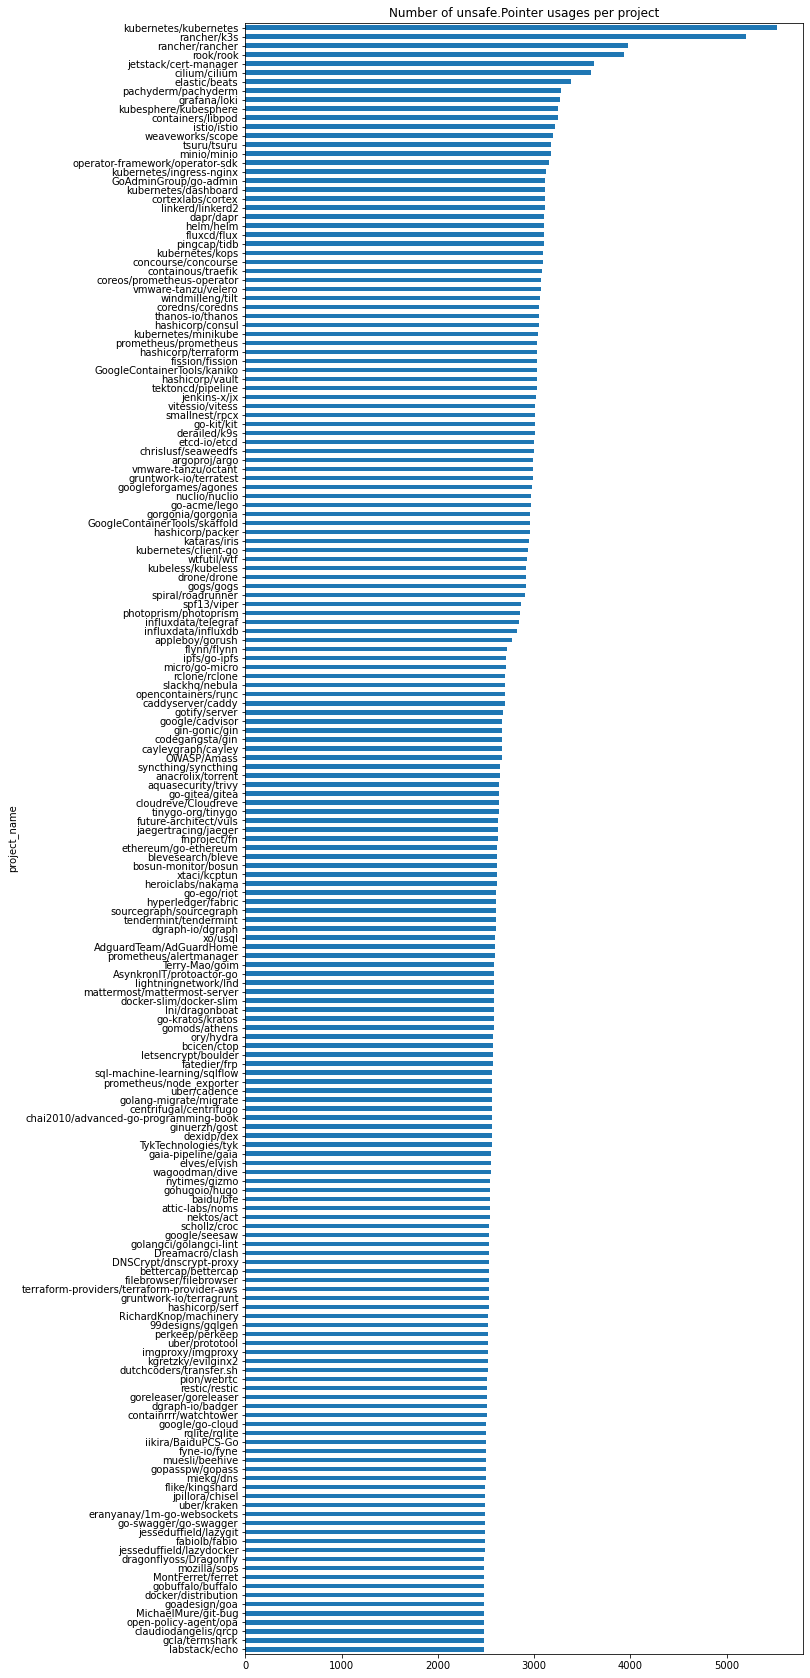

In [20]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .groupby('project_name')['project_name'].count()\
    .sort_values(ascending=True)[300:]\
    .plot.barh(title='Number of unsafe.Pointer usages per project', figsize=(10, 30))

## Anzahl von unsafe usages nach Modul

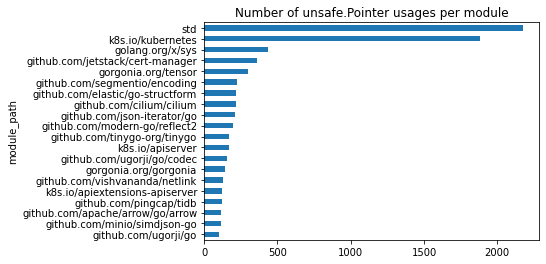

In [21]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .groupby(['module_path', 'project_name'])['module_path'].count()\
    .groupby('module_path').max()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(title='Number of unsafe.Pointer usages per module')

In [22]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .groupby(['module_path', 'project_name'])['module_path'].count()\
    .groupby('module_path').max()\
    .sort_values(ascending=False)[:15]

module_path
std                                 2176
k8s.io/kubernetes                   1881
golang.org/x/sys                     436
github.com/jetstack/cert-manager     358
gorgonia.org/tensor                  299
github.com/segmentio/encoding        223
github.com/elastic/go-structform     220
github.com/cilium/cilium             218
github.com/json-iterator/go          213
github.com/modern-go/reflect2        194
github.com/tinygo-org/tinygo         172
k8s.io/apiserver                     168
github.com/ugorji/go/codec           157
gorgonia.org/gorgonia                144
github.com/vishvananda/netlink       131
Name: module_path, dtype: int64

Wir sehen einen unglaublich großen Vorsprung der Standardlibrary mit ihren Packages. Danach scheint kubernetes einen vergleichsweise extremen Vorsprung zu haben, und das "gefährlichste" Module ist `sys`.

## Anzahl von unsafe Usages nach Package

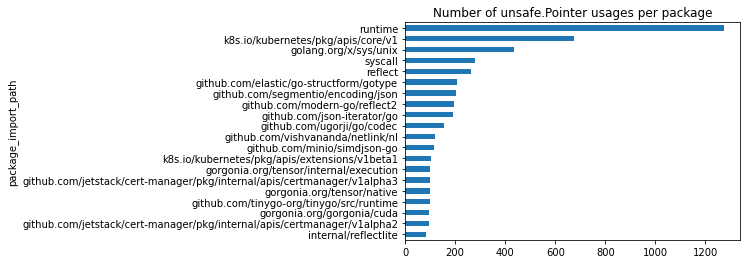

In [23]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .groupby(['package_import_path', 'project_name'])['package_import_path'].count()\
    .groupby('package_import_path').max()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(title='Number of unsafe.Pointer usages per package')

## Anzahl von unsafe.Pointer usages pro Registry

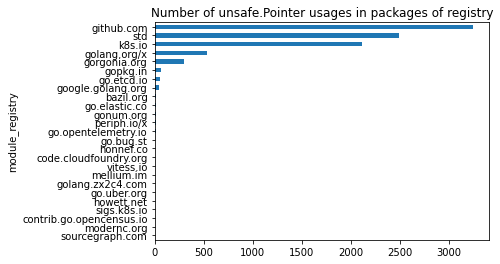

In [32]:
df1 = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .dropna()

df2 = package_df

mdf = pd.merge(df1, df2, how='left', 
         left_on=['project_name', 'package_import_path', 'module_path', 'module_version'], 
         right_on=['project_name', 'import_path', 'module_path', 'module_version'])

mdf\
    .groupby(['module_registry', 'package_import_path', 'project_name'])['module_registry'].count()\
    .groupby(['module_registry', 'package_import_path']).max()\
    .groupby('module_registry').sum()\
    .sort_values(ascending=True)\
    .plot.barh(title='Number of unsafe.Pointer usages in packages of registry')

In [34]:
df1 = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .dropna()

df2 = package_df

mdf = pd.merge(df1, df2, how='left', 
         left_on=['project_name', 'package_import_path', 'module_path', 'module_version'], 
         right_on=['project_name', 'import_path', 'module_path', 'module_version'])

mdf\
    .groupby(['module_registry', 'package_import_path', 'project_name'])['module_registry'].count()\
    .groupby(['module_registry', 'package_import_path']).max()\
    .groupby('module_registry').sum()\
    .sort_values(ascending=False)

module_registry
github.com                  3253
std                         2490
k8s.io                      2114
golang.org/x                 532
gorgonia.org                 299
gopkg.in                      61
go.etcd.io                    56
google.golang.org             41
bazil.org                     12
go.elastic.co                 11
gonum.org                     10
periph.io/x                   10
go.opentelemetry.io           10
go.bug.st                      8
honnef.co                      7
code.cloudfoundry.org          7
vitess.io                      7
mellium.im                     6
golang.zx2c4.com               6
go.uber.org                    3
howett.net                     2
sigs.k8s.io                    2
contrib.go.opencensus.io       2
modernc.org                    1
sourcegraph.com                1
Name: module_registry, dtype: int64

Wir sehen, dass die meisten unsafe usages in `github.com` zu finden sind, sogar noch mehr als in der Standardbibliothek. Das wird aber vermutlich einfach dadurch erzeugt, dass in dieser Registry auch die meisten Packages zu finden sind:

## Anzahl Packages pro Registry

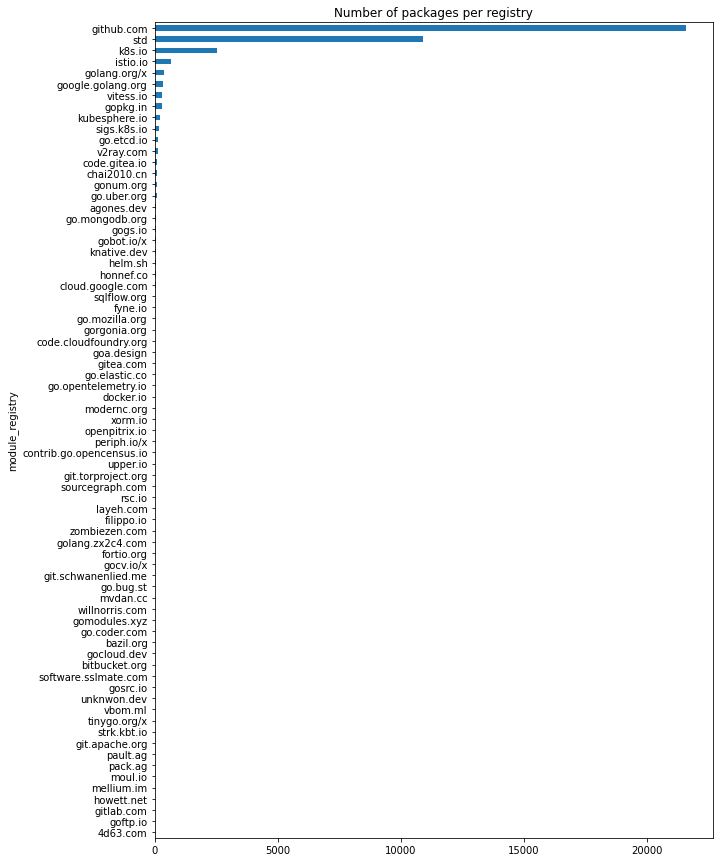

In [128]:
package_df\
    .groupby('module_registry')['import_path'].nunique()\
    .sort_values(ascending=True)\
    .plot.barh(title='Number of packages per registry', figsize=(10,15))

In [127]:
package_df\
    .groupby('module_registry')['import_path'].nunique()\
    .sort_values(ascending=False)

module_registry
github.com      21587
std             10888
k8s.io           2546
istio.io          684
golang.org/x      378
                ...  
mellium.im          1
howett.net          1
gitlab.com          1
goftp.io            1
4d63.com            1
Name: import_path, Length: 73, dtype: int64

## Unterschiedliche Anzahl von unsafe.Pointer usages in der gleichen Bibliothek

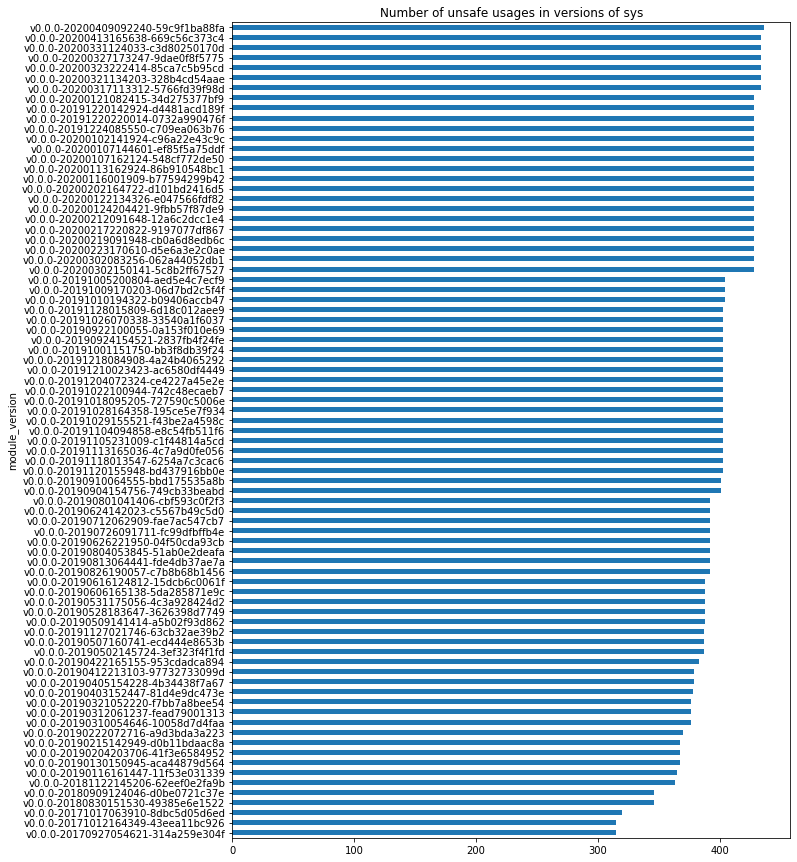

In [48]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .where(grep_df['module_path']=='golang.org/x/sys')\
    .groupby(['module_version', 'project_name'])['module_version'].count()\
    .groupby('module_version').max()\
    .sort_values(ascending=True)\
    .plot.barh(title='Number of unsafe usages in versions of sys', figsize=(10,15))

In [49]:
grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .where(grep_df['module_path']=='golang.org/x/sys')\
    .groupby(['module_version', 'project_name'])['module_version'].count()\
    .groupby('module_version').max()\
    .sort_values(ascending=False)

module_version
v0.0.0-20200409092240-59c9f1ba88fa    436
v0.0.0-20200413165638-669c56c373c4    434
v0.0.0-20200331124033-c3d80250170d    434
v0.0.0-20200327173247-9dae0f8f5775    434
v0.0.0-20200323222414-85ca7c5b95cd    434
                                     ... 
v0.0.0-20180909124046-d0be0721c37e    346
v0.0.0-20180830151530-49385e6e1522    346
v0.0.0-20171017063910-8dbc5d05d6ed    320
v0.0.0-20171012164349-43eea11bc926    315
v0.0.0-20170927054621-314a259e304f    315
Name: module_version, Length: 81, dtype: int64

Wir sehen, dass die verschiedenen Versionen zwischen 300 und 400 Usages haben. **Die Anzahl nimmt über die Zeit zu, die wenigsten Usages haben die Versionen von 2017, ganz oben stehen Versionen von 2020.**

## Anzahl von unsafe.Pointer usages pro Datei

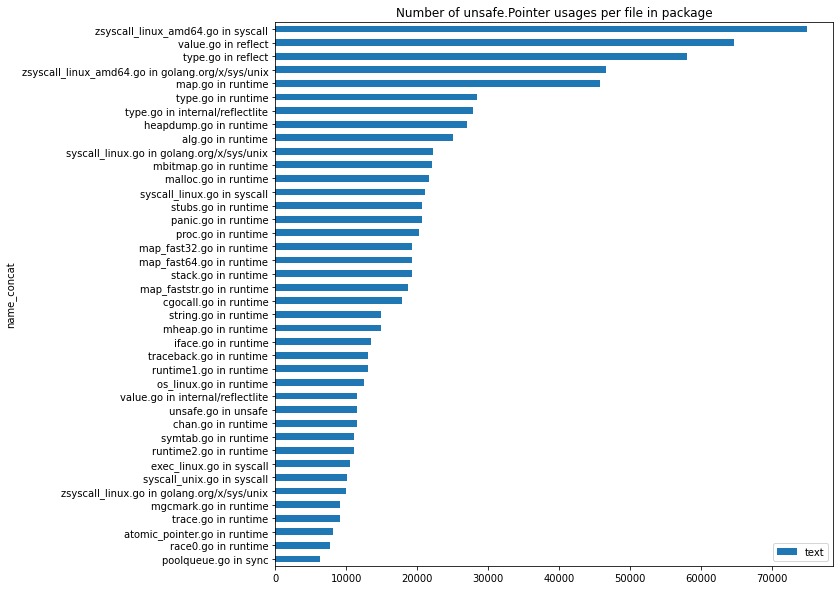

In [52]:
df = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .groupby(['file_name', 'package_import_path'], as_index=False)\
    ['text'].count()

df['name_concat'] = df.apply(lambda x: "{} in {}"\
                             .format(x['file_name'], x['package_import_path']), \
                             axis=1)

df\
    .iloc[:,[3,2]]\
    .sort_values(by='text', ascending=True)[-40:]\
    .plot.barh(x='name_concat', title='Number of unsafe.Pointer usages per file in package', figsize=(10,10))

Der Plot ist durch `sys` verzerrt, daher hier die Analyse ohne `sys`:

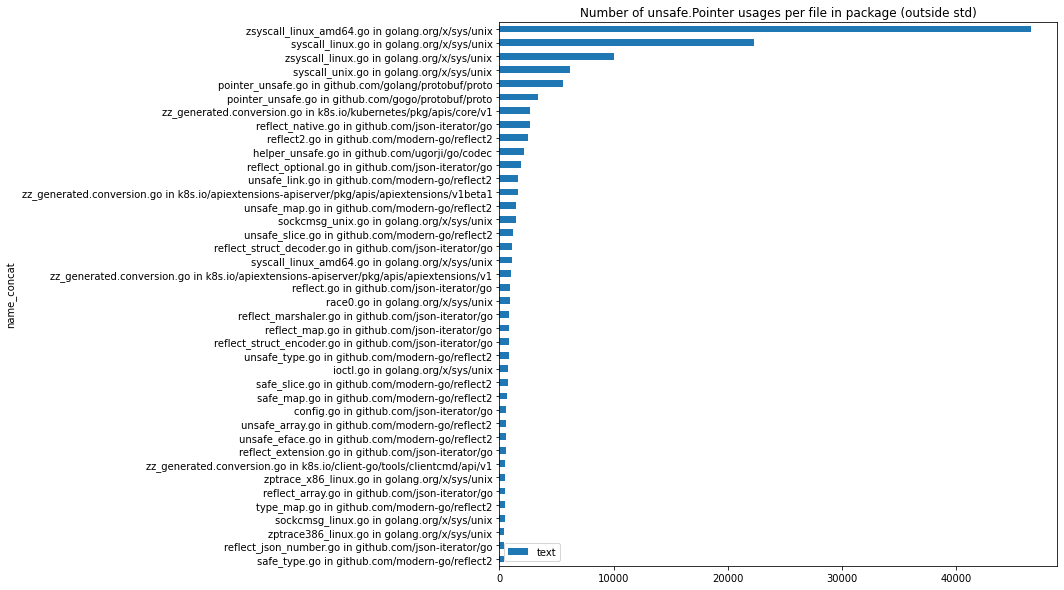

In [57]:
df = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .where(grep_df['module_path']!='std')\
    .groupby(['file_name', 'package_import_path'], as_index=False)\
    ['text'].count()

df['name_concat'] = df.apply(lambda x: "{} in {}"\
                             .format(x['file_name'], x['package_import_path']), \
                             axis=1)

df\
    .iloc[:,[3,2]]\
    .sort_values(by='text', ascending=True)[-40:]\
    .plot.barh(x='name_concat', title='Number of unsafe.Pointer usages per file in package (outside std)', figsize=(10,10))

In [59]:
df = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .where(grep_df['module_path']!='std')\
    .groupby(['file_name', 'package_import_path'], as_index=False)\
    ['text'].count()

df['name_concat'] = df.apply(lambda x: "{} in {}"\
                             .format(x['file_name'], x['package_import_path']), \
                             axis=1)

df\
    .iloc[:,[3,2]]\
    .sort_values(by='text', ascending=False)[:-20]

,name_concat,text
936,zsyscall_linux_amd64.go in golang.org/x/sys/unix,46519
744,syscall_linux.go in golang.org/x/sys/unix,22264
935,zsyscall_linux.go in golang.org/x/sys/unix,10000
746,syscall_unix.go in golang.org/x/sys/unix,6137
556,pointer_unsafe.go in github.com/golang/protobu...,5525
...,...,...
892,utmp_c.go in github.com/elastic/beats/v7/x-pac...,1
478,mod-check-default.go in github.com/vugu/vugu,1
479,moduledata.go in github.com/go-delve/delve/pkg...,1
867,util.go in github.com/apache/arrow/go/arrow/me...,1


## Wie oft werden Module importiert? (Beliebtheit)

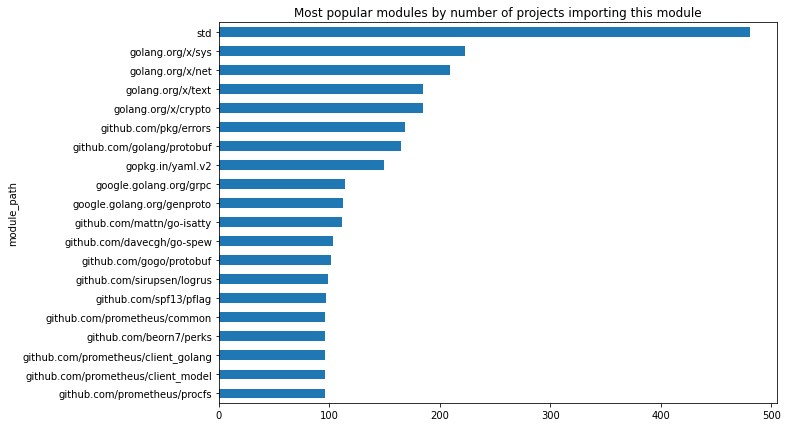

In [139]:
package_df\
    .groupby(['module_path'])['project_name'].nunique()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(title='Most popular modules by number of projects importing this module', figsize=(10,7))

In [138]:
package_df\
    .groupby(['module_path'])['project_name'].nunique()\
    .sort_values(ascending=False)[:20]

module_path
std                                    481
golang.org/x/sys                       223
golang.org/x/net                       209
golang.org/x/text                      185
golang.org/x/crypto                    185
github.com/pkg/errors                  168
github.com/golang/protobuf             165
gopkg.in/yaml.v2                       149
google.golang.org/grpc                 114
google.golang.org/genproto             112
github.com/mattn/go-isatty             111
github.com/davecgh/go-spew             103
github.com/gogo/protobuf               101
github.com/sirupsen/logrus              99
github.com/spf13/pflag                  97
github.com/prometheus/common            96
github.com/beorn7/perks                 96
github.com/prometheus/client_golang     96
github.com/prometheus/client_model      96
github.com/prometheus/procfs            96
Name: project_name, dtype: int64

## Wie viele Module importieren die Projekte jeweils?

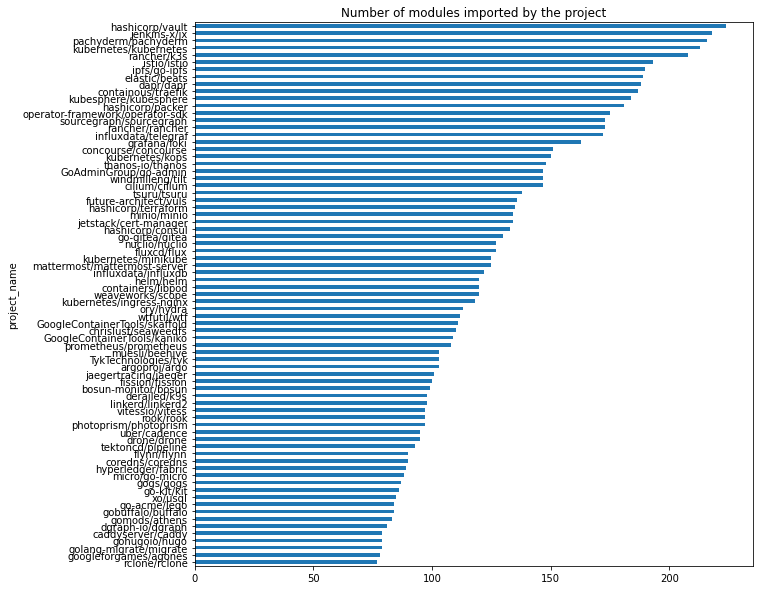

In [142]:
package_df\
    .groupby('project_name')['module_path'].nunique()\
    .sort_values(ascending=True)[-75:]\
    .plot.barh(title='Number of modules imported by the project', figsize=(10,10))

In [141]:
package_df\
    .groupby('project_name')['module_path'].nunique()\
    .sort_values(ascending=False)

project_name
hashicorp/vault          224
jenkins-x/jx             218
pachyderm/pachyderm      216
kubernetes/kubernetes    213
rancher/k3s              208
                        ... 
openfaas/faas              1
davecgh/go-spew            1
hashicorp/nomad            1
cyfdecyf/cow               1
hasura/gitkube             1
Name: module_path, Length: 481, dtype: int64

## Wie viele Packages importieren die Projekte jeweils?

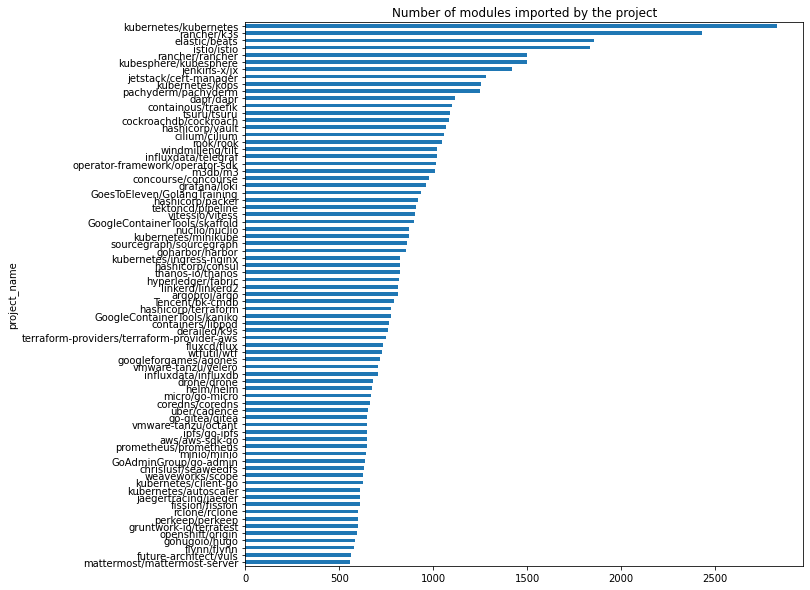

In [145]:
package_df\
    .groupby('project_name')['import_path'].nunique()\
    .sort_values(ascending=True)[-75:]\
    .plot.barh(title='Number of modules imported by the project', figsize=(10,10))

In [143]:
package_df\
    .groupby('project_name')['import_path'].nunique()\
    .sort_values(ascending=False)

project_name
kubernetes/kubernetes                 2829
rancher/k3s                           2428
elastic/beats                         1857
istio/istio                           1836
rancher/rancher                       1499
                                      ... 
buger/jsonparser                        32
astaxie/go-best-practice                31
unknwon/go-fundamental-programming      31
andlabs/ui                              28
jroimartin/gocui                        22
Name: import_path, Length: 481, dtype: int64

## Welche Module haben die meisten Packages?

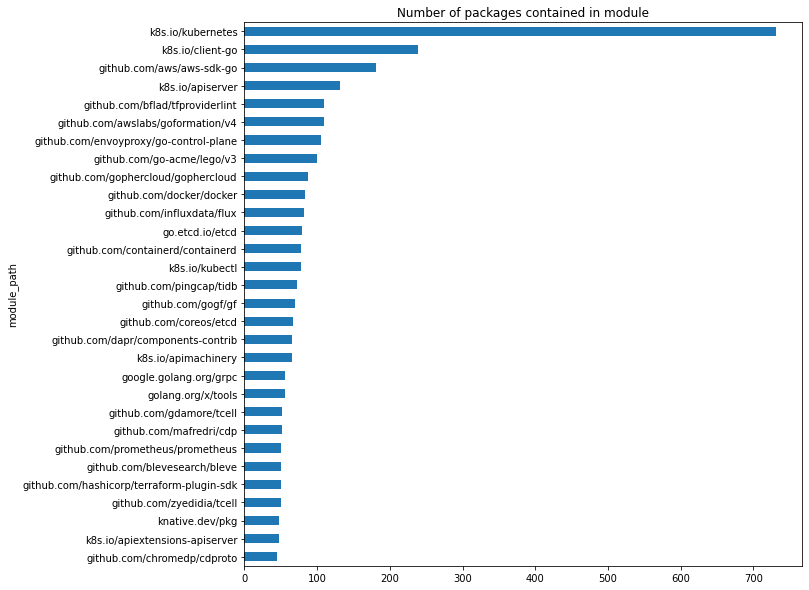

In [151]:
package_df\
    .where(package_df['module_path']!='std')\
    .groupby(['module_path', 'module_version'])['import_path'].nunique()\
    .groupby('module_path').max()\
    .sort_values(ascending=True)[-30:]\
    .plot.barh(title='Number of packages contained in module (excluding std)', figsize=(10,10))

In [152]:
package_df\
    .where(package_df['module_path']!='std')\
    .groupby(['module_path', 'module_version'])['import_path'].nunique()\
    .groupby('module_path').max()\
    .sort_values(ascending=False)[:30]

module_path
k8s.io/kubernetes                            731
k8s.io/client-go                             239
github.com/aws/aws-sdk-go                    181
k8s.io/apiserver                             131
github.com/bflad/tfproviderlint              110
github.com/awslabs/goformation/v4            110
github.com/envoyproxy/go-control-plane       105
github.com/go-acme/lego/v3                   100
github.com/gophercloud/gophercloud            88
github.com/docker/docker                      83
github.com/influxdata/flux                    82
go.etcd.io/etcd                               79
github.com/containerd/containerd              78
k8s.io/kubectl                                78
github.com/pingcap/tidb                       72
github.com/gogf/gf                            70
github.com/coreos/etcd                        67
github.com/dapr/components-contrib            65
k8s.io/apimachinery                           65
google.golang.org/grpc                        56
golang.o

## Anzahl von Modulen und Packages pro Projekt

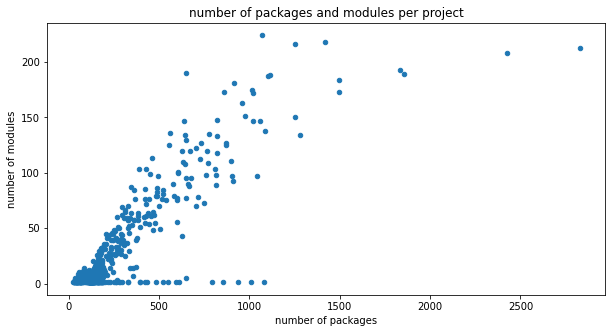

In [164]:
df1 = package_df\
    .groupby('project_name')['import_path'].nunique()

df2 = package_df\
    .groupby('project_name')['module_path'].nunique()

pd.merge(df1, df2, how='inner', on='project_name')\
    .plot.scatter(x='import_path', y='module_path', 
                  title='number of packages and modules per project',
                  figsize=(10,5))

plt.xlabel('number of packages')
plt.ylabel('number of modules')
plt.show()

## Prozentsatz von unsafe.Pointer nutzenden Modulen

In [76]:
total_modules_count = package_df['module_path'].nunique()
unsafe_modules_count = grep_df['module_path'].nunique()

In [73]:
print("{} of {} modules ({:.1%}) have at least one unsafe usage."\
      .format(unsafe_modules_count, total_modules_count, unsafe_modules_count/total_modules_count))

553 of 3119 modules (17.7%) have at least one unsafe usage.


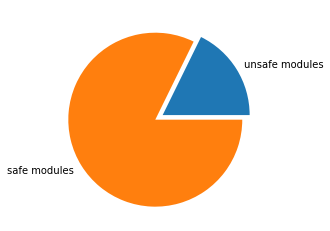

In [74]:
data = [unsafe_modules_count, total_modules_count - unsafe_modules_count]

plt.pie(data, labels=['unsafe modules', 'safe modules'], explode=(0, 0.1))

plt.show()

## Prozentsatz von unsafe.Pointer nutzenden Packages

In [77]:
total_packages_count = package_df['import_path'].nunique()
unsafe_packages_count = grep_df['package_import_path'].nunique()

In [78]:
print("{} of {} packages ({:.1%}) have at least one unsafe usage."\
      .format(unsafe_packages_count, total_packages_count, unsafe_packages_count/total_packages_count))

1179 of 37482 packages (3.1%) have at least one unsafe usage.


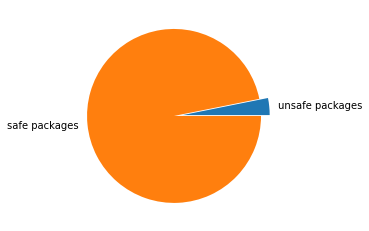

In [79]:
data = [unsafe_packages_count, total_packages_count - unsafe_packages_count]

plt.pie(data, labels=['unsafe packages', 'safe packages'], explode=(0, 0.1))

plt.show()

## Verteilung von unsafe auf verschiedene match types

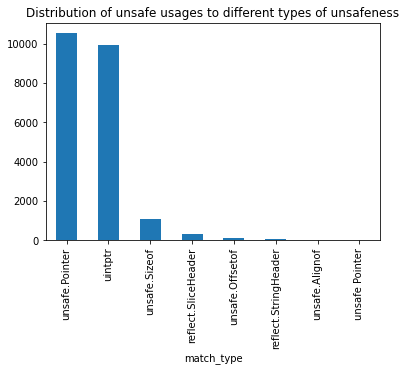

In [82]:
grep_df\
    .groupby(['match_type', 'package_import_path', 'project_name'])['match_type'].count()\
    .groupby(['match_type', 'package_import_path']).max()\
    .groupby('match_type').sum()\
    .sort_values(ascending=False)\
    .plot.bar(title='Distribution of unsafe usages to different types of unsafeness')

In [83]:
grep_df\
    .groupby(['match_type', 'package_import_path', 'project_name'])['match_type'].count()\
    .groupby(['match_type', 'package_import_path']).max()\
    .groupby('match_type').sum()\
    .sort_values(ascending=False)

match_type
unsafe.Pointer          10525
uintptr                  9926
unsafe.Sizeof            1109
reflect.SliceHeader       331
unsafe.Offsetof           146
reflect.StringHeader       93
unsafe.Alignof             34
unsafe Pointer              1
Name: match_type, dtype: int64

unsafe.Pointer und uintprt dominieren klar. Vermutlich werden sie fast immer gemeinsam genutzt. unsafe.Sizeof ist ebenfalls noch relativ häufig vertreten. Die anderen Typen sind im Vergleich extrem selten. Genau das könnte aber bedeuten, dass es Sinn macht sich diese manuell anzuschauen!

## Gleichzeitige Verwendung von uintptr und unsafe.Pointer

In [84]:
df1 = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer').dropna()\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

df2 = grep_df\
    .where(grep_df['match_type']=='uintptr').dropna()\
    .drop_duplicates(subset=['package_import_path', 'file_name', 'line_number'])

mdf = pd.merge(df1, df2, how='outer', on=['package_import_path', 'file_name', 'line_number'])\
    .loc[:,['package_import_path', 'file_name', 'line_number', 'text_x', 'context_x', 'text_y', 'context_y', 
            'match_type_x', 'match_type_y']]

simultaneous_usages_df = mdf.dropna()
uintptr_without_unsafePointer_df = mdf.loc[mdf['match_type_x'].isnull()]
unsafePointer_without_uintptr_df = mdf.loc[mdf['match_type_y'].isnull()]

In [85]:
print("Number of unsafe.Pointer lines: {}".format(df1['line_number'].count()))
print("Number of uintptr lines: {}".format(df2['line_number'].count()))
print()
print("Number of simultaneous usages: {}".format(simultaneous_usages_df['line_number'].count()))
print("unsafe.Pointer used without uintptr: {}".format(unsafePointer_without_uintptr_df['line_number'].count()))
print("uintptr used without unsafe.Pointer: {}".format(uintptr_without_unsafePointer_df['line_number'].count()))

Number of unsafe.Pointer lines: 12286
Number of uintptr lines: 11273

Number of simultaneous usages: 2679
unsafe.Pointer used without uintptr: 9607
uintptr used without unsafe.Pointer: 8594


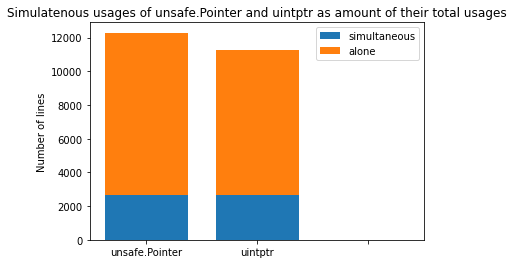

In [87]:
together_data = [simultaneous_usages_df['line_number'].count(), simultaneous_usages_df['line_number'].count(), 0]
alone_data = [unsafePointer_without_uintptr_df['line_number'].count(), 
              uintptr_without_unsafePointer_df['line_number'].count(), 0]
idx = np.arange(3)/3

p1 = plt.bar(idx, together_data, width=0.25)
p2 = plt.bar(idx, alone_data, width=0.25, bottom=together_data)

plt.ylabel('Number of lines')
plt.xticks(idx, ['unsafe.Pointer', 'uintptr', ''])
plt.legend((p1[0], p2[0]), ('simultaneous', 'alone'), loc='upper right')
plt.title('Simulatenous usages of unsafe.Pointer and uintptr as amount of their total usages')

plt.show()

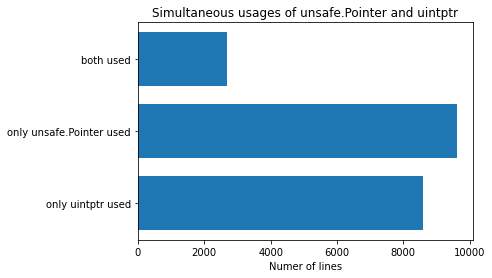

In [88]:
data = [uintptr_without_unsafePointer_df['line_number'].count(),
        unsafePointer_without_uintptr_df['line_number'].count(),
        simultaneous_usages_df['line_number'].count()]
idx = np.arange(3)/3
width = 0.25

plt.barh(idx, data, width)
plt.xlabel('Numer of lines')
plt.yticks(idx, ['only uintptr used', 'only unsafe.Pointer used', 'both used'])
plt.title('Simultaneous usages of unsafe.Pointer and uintptr')

plt.show()

In [91]:
print("simultaneous:")
print(simultaneous_usages_df['text_x'][11])

print("only unsafe.Pointer:")
print(unsafePointer_without_uintptr_df['text_x'].iloc[10])

print("only uintptr:")
print(uintptr_without_unsafePointer_df['text_y'].iloc[10])

simultaneous:
func abigen_runtime_memequal(a, b unsafe.Pointer, size uintptr) bool

only unsafe.Pointer:
	_cgo_yield                    unsafe.Pointer

only uintptr:
		wbBufFlush(slot, uintptr(new))



## Vet Ergebnisse pro Projekt

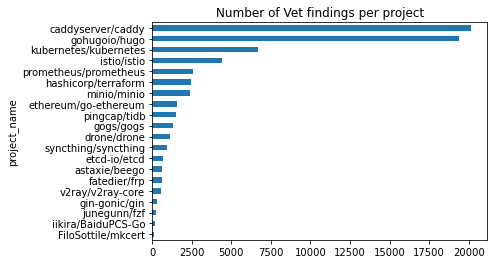

In [36]:
vet_df\
    .groupby('project_name')['project_name'].count()\
    .sort_values(ascending=True)\
    .plot.barh(title='Number of Vet findings per project')

In [37]:
vet_df\
    .groupby('project_name')['project_name'].count()\
    .sort_values(ascending=False)

project_name
caddyserver/caddy        20150
gohugoio/hugo            19407
kubernetes/kubernetes     6706
istio/istio               4379
prometheus/prometheus     2553
hashicorp/terraform       2470
minio/minio               2406
ethereum/go-ethereum      1569
pingcap/tidb              1522
gogs/gogs                 1316
drone/drone               1105
syncthing/syncthing        908
etcd-io/etcd               681
astaxie/beego              600
fatedier/frp               594
v2ray/v2ray-core           561
gin-gonic/gin              294
junegunn/fzf               231
iikira/BaiduPCS-Go         176
FiloSottile/mkcert         133
Name: project_name, dtype: int64

## Vet Ergebnisse pro Modul

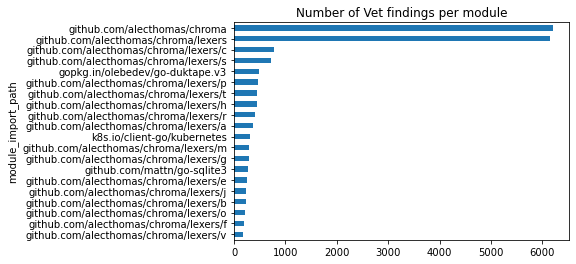

In [38]:
vet_df\
    .groupby(['module_import_path', 'project_name'])['module_import_path'].count()\
    .groupby('module_import_path').max()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(title='Number of Vet findings per module')

In [39]:
vet_df\
    .groupby(['module_import_path', 'project_name'])['module_import_path'].count()\
    .groupby('module_import_path').max()\
    .sort_values(ascending=False)[:20]

module_import_path
github.com/alecthomas/chroma             6206
github.com/alecthomas/chroma/lexers      6158
github.com/alecthomas/chroma/lexers/c     779
github.com/alecthomas/chroma/lexers/s     712
gopkg.in/olebedev/go-duktape.v3           475
github.com/alecthomas/chroma/lexers/p     468
github.com/alecthomas/chroma/lexers/t     449
github.com/alecthomas/chroma/lexers/h     440
github.com/alecthomas/chroma/lexers/r     408
github.com/alecthomas/chroma/lexers/a     369
k8s.io/client-go/kubernetes               311
github.com/alecthomas/chroma/lexers/m     288
github.com/alecthomas/chroma/lexers/g     287
github.com/mattn/go-sqlite3               267
github.com/alecthomas/chroma/lexers/e     250
github.com/alecthomas/chroma/lexers/j     239
github.com/alecthomas/chroma/lexers/b     227
github.com/alecthomas/chroma/lexers/o     221
github.com/alecthomas/chroma/lexers/f     201
github.com/alecthomas/chroma/lexers/v     182
Name: module_import_path, dtype: int64

## Vet Ergebnisse im Zusammenhang mit unsafe

In [180]:
df1 = matches_df\
    .drop_duplicates(subset=['module_import_path', 'file_name', 'line_number'])

df2 = vet_df\
    .drop_duplicates(subset=['module_import_path', 'file_name', 'line_number'])

mdf = pd.merge(df1, df2, how='outer', on=['module_import_path', 'file_name', 'line_number'])\
    .loc[:,['module_import_path', 'file_name', 'line_number', 'text', 'context', 'match_type', 'message']]

vet_and_unsafe_df = mdf.dropna()
only_vet_df = mdf.loc[mdf['text'].isnull()]
only_unsafe_df = mdf.loc[mdf['message'].isnull()]

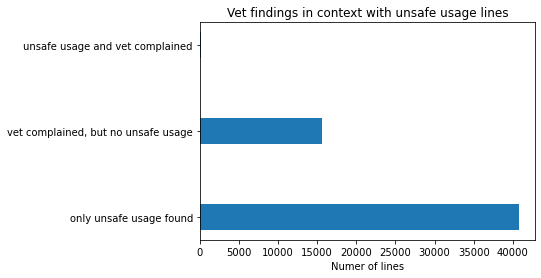

In [191]:
data = [only_unsafe_df['line_number'].count(),
        only_vet_df['line_number'].count(),
        vet_and_unsafe_df['line_number'].count()]
idx = np.arange(3)/3
width = 0.1

plt.barh(idx, data, width)
plt.xlabel('Numer of lines')
plt.yticks(idx, ['only unsafe usage found', 'vet complained, but no unsafe usage', 'unsafe usage and vet complained'])
plt.title('Vet findings in context with unsafe usage lines')

plt.show()

## Anzahl unsafe.Pointer usages, die von Vet erkannt wurden

In [186]:
df1 = matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer')\
    .drop_duplicates(subset=['module_import_path', 'file_name', 'line_number'])

df2 = vet_df\
    .drop_duplicates(subset=['module_import_path', 'file_name', 'line_number'])

vet_unsafePointer_df = pd.merge(df1, df2, how='outer', on=['module_import_path', 'file_name', 'line_number'])\
    .dropna()\
    .loc[:,['module_import_path', 'file_name', 'line_number', 'text', 'context', 'match_type', 'message']]

In [188]:
print("Number of lines with unsafe.Pointer usage that were flagged by vet: {}"\
      .format(vet_unsafePointer_df['message'].count()))
print()
print("Vet messages on these lines:")
print(vet_unsafePointer_df['message'].sort_values())

Number of lines with unsafe.Pointer usage that were flagged by vet: 48

Vet messages on these lines:
20222     SYS___SYSCTL not declared by package syscall
19767     SYS___SYSCTL not declared by package syscall
20225     SYS___SYSCTL not declared by package syscall
489      UTF16ToString not declared by package syscall
616      UTF16ToString not declared by package syscall
16782                         undeclared name: Cmsghdr
12348                         undeclared name: Cmsghdr
6286                          undeclared name: Cmsghdr
22119                           undeclared name: Errno
219                          undeclared name: Iterator
16626                          undeclared name: PollFd
14574                          undeclared name: PollFd
15227                          undeclared name: PollFd
14969                          undeclared name: PollFd
15500                          undeclared name: PollFd
15872                          undeclared name: PollFd
16082              

Wir sehen, dass hier in keinem Fall eine Ausgabe des `-unsafeptr` Checks von Vet vorliegt. Es gibt lediglich Nachrichten, die bemängeln, dass ein Identifier nicht deklariert wurde (`undeclared name` und `not declared by package`

## Verteilung unsafe.Pointer usage auf Stars/Forks/LastPushAge

In [92]:
df1 = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .dropna()

df2 = projects_df

mdf = pd.merge(df1, df2, how='left', on=['project_name'])

fields = ['project_name', 'project_number_of_stars', 'project_number_of_forks', 'project_created_at',\
          'project_last_pushed_at']

unsafe_by_project_features_df = mdf\
    .loc[:,fields+['line_number']]\
    .groupby(fields).count().reset_index()

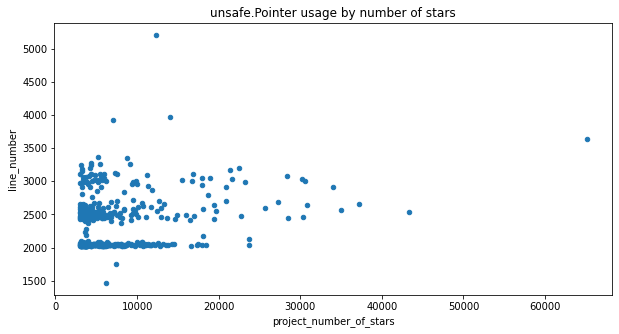

In [93]:
unsafe_by_project_features_df\
    .plot.scatter(x='project_number_of_stars', y='line_number', 
                  title='unsafe.Pointer usage by number of stars', 
                  figsize=(10,5))

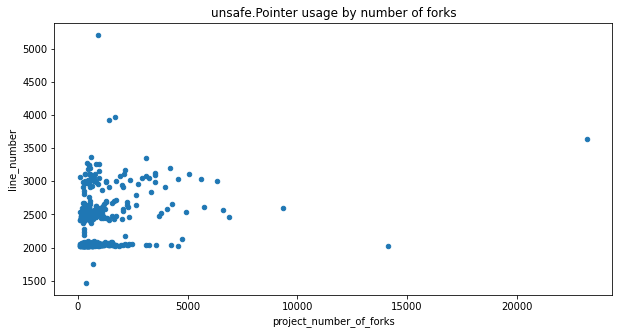

In [94]:
unsafe_by_project_features_df\
    .plot.scatter(x='project_number_of_forks', y='line_number', 
                  title='unsafe.Pointer usage by number of forks', 
                  figsize=(10,5))

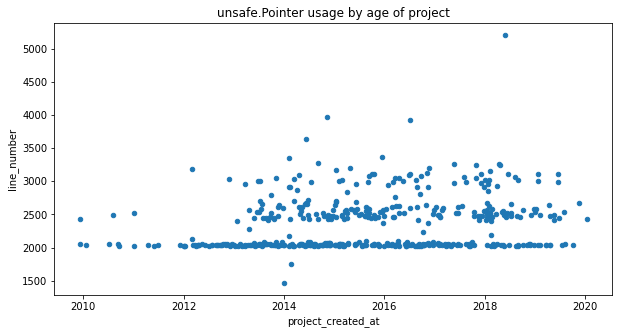

In [95]:
unsafe_by_project_features_df\
    .plot.scatter(x='project_created_at', y='line_number', 
                  title='unsafe.Pointer usage by age of project', 
                  figsize=(10,5))

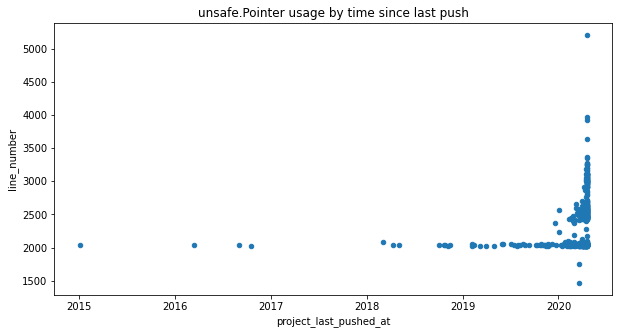

In [96]:
unsafe_by_project_features_df\
    .plot.scatter(x='project_last_pushed_at', y='line_number', 
                  title='unsafe.Pointer usage by time since last push',
                  figsize=(10,5))

## unsafe.Pointer usage pro Modul, gewichtet nach Modulbeliebtheit

In [180]:
df1 = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .groupby(['module_path', 'project_name'])\
    .agg(unsafe_count=pd.NamedAgg(column='module_path', aggfunc='count'))\
    .groupby('module_path').max()

df2 = package_df\
    .groupby('module_path')\
    .agg(import_count=pd.NamedAgg(column='project_name', aggfunc='nunique'))

unsafe_modules_weighted_popularity_df = pd.merge(df1, df2, how='inner', on=['module_path'])

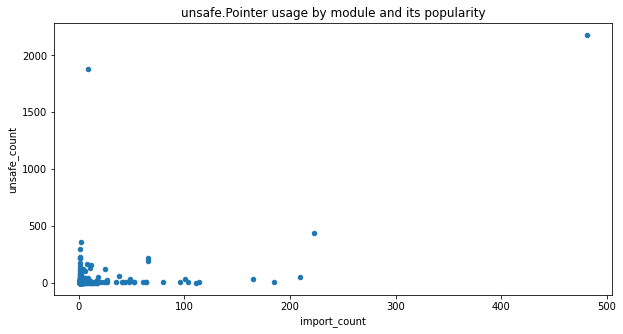

In [181]:
unsafe_modules_weighted_popularity_df\
    .plot.scatter(x='import_count', y='unsafe_count', 
                  title='unsafe.Pointer usage by module and its popularity',
                  figsize=(10,5))

Offensichtlich wäre der interessanteste Punkt das Modul ganz oben rechts. Das ist allerdings die Standardlibrary. Hat sie besseren Code als andere Module?

Analyse ohne die Standardlibrary:

In [183]:
df1 = grep_df\
    .where(grep_df['match_type']=='unsafe.Pointer')\
    .where(grep_df['module_path']!='std')\
    .groupby(['module_path', 'project_name'])\
    .agg(unsafe_count=pd.NamedAgg(column='module_path', aggfunc='count'))\
    .groupby('module_path').max()

df2 = package_df\
    .where(grep_df['module_path']!='std')\
    .groupby('module_path')\
    .agg(import_count=pd.NamedAgg(column='project_name', aggfunc='nunique'))

df = pd.merge(df1, df2, how='inner', on=['module_path'])

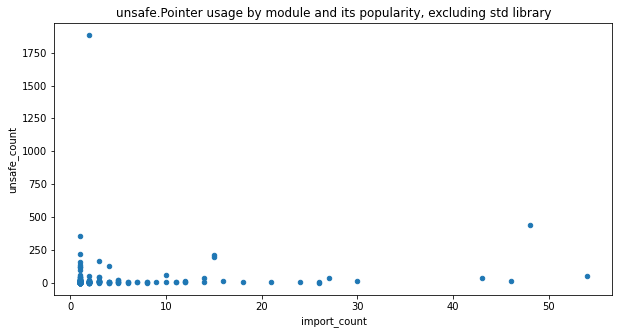

In [184]:
df.plot.scatter(x='import_count', y='unsafe_count', 
                title='unsafe.Pointer usage by module and its popularity, excluding std library',
                figsize=(10,5))

## Interessanteste Module gemäß Score aus Anzahl unsafe und Beliebtheit

In [185]:
weighted_df = unsafe_modules_weighted_popularity_df

weighted_df['score'] = weighted_df[['unsafe_count', 'import_count']]\
    .apply(lambda x: x['unsafe_count'] * x['import_count'], axis=1)

weighted_df\
    .sort_values(by='score', ascending=False)[:20]

,unsafe_count,import_count,score
module_path,,,
std,2176,481,1046656
golang.org/x/sys,436,223,97228
k8s.io/kubernetes,1881,9,16929
github.com/json-iterator/go,213,66,14058
github.com/modern-go/reflect2,194,66,12804
golang.org/x/net,49,209,10241
github.com/golang/protobuf,35,165,5775
github.com/gogo/protobuf,36,101,3636
k8s.io/apiextensions-apiserver,124,25,3100


Nach der Standardlibrary und dem `sys` Paket scheinen vor allem diese Module interessant zu sein:

 - k8s.io/kubernetes weil es sehr viele unsafe.Pointer usages hat
 - github.com/json-iterator/go weil es vergleichsweise häufig importiert wird und unsafe.Pointer usages hat
 - github.com/modern-go/reflect2	 weil es vergleichsweise häufig importiert wird, unsafe.Pointer usages hat und nicht von golang.org ist
 - github.com/golang/protobuf aus dem gleichen Grund

## Top 10 häufigste unsafe.Pointer Snippets

In [187]:
usages = grep_df\
    .groupby(['text'])\
    .agg(count=pd.NamedAgg(column='text', aggfunc='count')).reset_index()\
    .sort_values(by='count', ascending=False)[:10]

for i, usage in usages.iterrows():
    print("{} usages:".format(usage['count']))
    print(usage['text'])

13444 usages:
		_p0 = unsafe.Pointer(&_zero)

13444 usages:
	var _p0 unsafe.Pointer

12009 usages:
		return &(*u)(unsafe.Pointer(t)).u

8658 usages:
	b := (*bmap)(unsafe.Pointer(uintptr(h.buckets) + bucket*uintptr(t.bucketsize)))

6318 usages:
	_, _, e1 := Syscall6(SYS_MOUNT, uintptr(unsafe.Pointer(_p0)), uintptr(unsafe.Pointer(_p1)), uintptr(unsafe.Pointer(_p2)), uintptr(flags), uintptr(unsafe.Pointer(data)), 0)

5772 usages:
	hash := t.hasher(noescape(unsafe.Pointer(&key)), uintptr(h.hash0))

5616 usages:
	r0, _, e1 := Syscall6(SYS_RECVFROM, uintptr(fd), uintptr(_p0), uintptr(len(p)), uintptr(flags), uintptr(unsafe.Pointer(from)), uintptr(unsafe.Pointer(fromlen)))

5616 usages:
	r0, _, e1 := Syscall6(SYS_SPLICE, uintptr(rfd), uintptr(unsafe.Pointer(roff)), uintptr(wfd), uintptr(unsafe.Pointer(woff)), uintptr(len), uintptr(flags))

4914 usages:
	_, _, e1 := Syscall6(SYS_SETXATTR, uintptr(unsafe.Pointer(_p0)), uintptr(unsafe.Pointer(_p1)), uintptr(_p2), uintptr(len(data)), uintptr(flag

## Top 50 interessanteste unsafe.Pointer Snippets (nach Modulbeliebtheit)

In [189]:
# TODO

grep_df\
    .groupby(['text'])\
    .agg(count=pd.NamedAgg(column='text', aggfunc='count')).reset_index()\
    .sort_values(by='count', ascending=False)[:10]

,text,count
1592,\t\t_p0 = unsafe.Pointer(&_zero)\n,13444
9147,\tvar _p0 unsafe.Pointer\n,13444
2718,\t\treturn &(*u)(unsafe.Pointer(t)).u\n,12009
4513,\tb := (*bmap)(unsafe.Pointer(uintptr(h.bucket...,8658
4088,"\t_, _, e1 := Syscall6(SYS_MOUNT, uintptr(unsa...",6318
5473,\thash := t.hasher(noescape(unsafe.Pointer(&ke...,5772
7781,"\tr0, _, e1 := Syscall6(SYS_RECVFROM, uintptr(...",5616
7786,"\tr0, _, e1 := Syscall6(SYS_SPLICE, uintptr(rf...",5616
4099,"\t_, _, e1 := Syscall6(SYS_SETXATTR, uintptr(u...",4914
1599,\t\t_p0 = unsafe.Pointer(&p[0])\n,4914


## Scratch Space

In [40]:
"Hi"

'Hi'